tenha uma amostra que represente os dados
aleatoria mantendo proporca orig

tenha uma amostra q represente algo que seja feiro no seu oc colocd em nuvem 

regularizacao evita um poucoo overfit
parametro de 

# Estrategia de treino e teste

In [1]:
import pandas as pd
import numpy as np


In [2]:
data_raw = pd.read_csv('train.csv')

In [3]:
data_raw.columns

Index(['id_cliente', 'idade', 'saldo_atual', 'divida_atual', 'renda_anual',
       'valor_em_investimentos', 'taxa_utilizacao_credito', 'num_emprestimos',
       'num_contas_bancarias', 'num_cartoes_credito', 'dias_atraso_dt_venc',
       'num_pgtos_atrasados', 'num_consultas_credito', 'taxa_juros',
       'investe_exterior', 'pessoa_polit_exp', 'limite_adicional'],
      dtype='object')

In [4]:
factures = ['id_cliente', 'idade', 'saldo_atual', 'divida_atual', 'renda_anual',
            'valor_em_investimentos', 'taxa_utilizacao_credito', 'num_emprestimos',
            'num_contas_bancarias', 'num_cartoes_credito', 'dias_atraso_dt_venc',
            'num_pgtos_atrasados', 'num_consultas_credito', 'taxa_juros',
            'investe_exterior', 'pessoa_polit_exp']

label = ['limite_adicional']

# Treino e teste do modelo 

In [5]:
Cor = ['Azul','Amarelo','Vermelho',]
Combustivel = ['Gasolina','Etanol','Disel']
Preco = [30000, 15000, 60000]
num_portas = [4, 0, 6]
tipo_veiculo = ['Carro', 'Moto', 'Onibus']

# Criar o dicionário com os dados
data = {
    'Cor': Cor,
    'Combustível': Combustivel,
    'Preço': Preco,
    'Número de Portas': num_portas,
    'Tipo de Veículo': tipo_veiculo
}



In [6]:

# Criar o dataframe
df_original = pd.DataFrame(data)

# Definir a quantidade de linhas adicionais desejadas (50 - 3 = 47 linhas adicionais)
num_linhas_adicionais = 47

# Gerar cópias adicionais do dataframe original
new_df = pd.concat([df_original] * num_linhas_adicionais, ignore_index=True)

# Mostrar o dataframe com mais de 30 linhas
new_df.head(10)


,Cor,Combustível,Preço,Número de Portas,Tipo de Veículo
0,Azul,Gasolina,30000,4,Carro
1,Amarelo,Etanol,15000,0,Moto
2,Vermelho,Disel,60000,6,Onibus
3,Azul,Gasolina,30000,4,Carro
4,Amarelo,Etanol,15000,0,Moto
5,Vermelho,Disel,60000,6,Onibus
6,Azul,Gasolina,30000,4,Carro
7,Amarelo,Etanol,15000,0,Moto
8,Vermelho,Disel,60000,6,Onibus
9,Azul,Gasolina,30000,4,Carro


In [7]:
new_df.dtypes 

Cor                 object
Combustível         object
Preço                int64
Número de Portas     int64
Tipo de Veículo     object
dtype: object

# Validacao Holdout

## Treinamento do joaquim

# Imports

In [8]:
import pandas as pd
import numpy as np
from sklearn import datasets as ds
from sklearn import model_selection as ms
from sklearn import tree as tr
from sklearn import metrics as mt

# Dados sinteticos

In [9]:
# funcao boa para fazer alguns testes 

n_samples=20000
n_features=2
n_informative=2 # quantas represantam realmente o fenomono
n_redundant=0 # quantas relacionadas eu teria 
random_state=0 # poderia ser o defalt

# me retorna x , y  conj de rtreino eas fctures e os rotulos
X, y = ds.make_classification( n_samples=n_samples,# N de amostras 
                               n_features=n_features,# N de fectures col do dataset
                               n_informative=n_informative, # fectures informativa
                               n_redundant=n_redundant,# fectures redundantes, auto corre ou muito corr
                               random_state=random_state)# cid de aleatoriedadde, td vz q rod vir o msm result


# production dataset
X, X_prod, y, y_prod = ms.train_test_split( X, y, test_size = 0.2, random_state=random_state)# test size 0,2 = 20% randon manter a aleatoriedd

# Se;arados 20% do meu conjunto, ele fica guardado em X+prod e y_prod e os outros 80%

In [10]:
df = pd.DataFrame(X)
print(df.shape)
print()
print(df.head())
print()
print(type(X))

(16000, 2)

          0         1
0  1.690898  0.036090
1  0.607581  0.193608
2 -0.088978  0.878089
3  0.387026 -2.189495
4 -0.942144  2.181458

<class 'numpy.ndarray'>


# Nao há separacao de dados

In [11]:
# modelo bem simplees de arv de decisao , com nde fecture = 2 para que seja tao complexo a ponto da arvr nao consegui ajustar os pontos
# parametro importan max_depth quantidad que eu permito que minha arvore cresça
# quais os paramentros que fazem o alg ter um underfit ou overfit o max_depth é um dos que overfit da arvr

#Define model
model = tr.DecisionTreeClassifier( max_depth=38)
model.fit(X, y)

# Classification sobre os dados de treinamento 
yhat = model.predict(X)
acc = mt.accuracy_score( y, yhat)

print('Accuracy Over Traning : {}'.format(acc))

Accuracy Over Traning : 1.0


# Publicacao do Modelo em Producao

In [12]:
yhat_prod = model.predict(X_prod)
acc_prod = mt.accuracy_score( y_prod, yhat_prod )

print('Acuraccy Over Production: {}'.format(acc_prod))

Acuraccy Over Production: 0.85275


# Estrategia de Treino-Teste

In [13]:
# Separar os dados em treinamento e teste
X_train, X_test, y_train, y_test = ms.train_test_split( X , y, test_size=0.2, random_state=random_state)

In [14]:
# Modelo treinado com os dados de treinamento
model = tr.DecisionTreeClassifier(max_depth=38)
model.fit(X_train, y_train)

# Classificacao sobre os dados de teste
yhat_test = model.predict(X_test)
# Calcular a accuracy
acc_test = mt.accuracy_score( y_test, yhat_test)

print('Accuracy Over Test: {}'.format( acc_test))
 
# forma de metrificar o aprendizado para dados que ele nunca viu 

Accuracy Over Test: 0.84875


In [15]:
from matplotlib import pyplot as plt

# Escolhendo os Parametros do algoritimo


In [16]:
# Algoritimo de GridSarch ganacia testa tudo contra tudo  essa metrica e so para exemplificar

# Criar uuma variavel, valueas nesse cria um for  1 a 60 esse vl popul values criar dentro de uma lista faco lista de compra rancho

values = [ i for i in range( 1, 60 )]

test_score = list()
for i in values:
    tr.DecisionTreeClassifier(max_depth=i)
    model.fit(X_train, y_train)
    
    # Classificacao sobre o test
    yhat_test = model.predict(X_test)
    acc_test = mt.accuracy_score(y_test, yhat_test)
    
    test_score.append(acc_test)
    

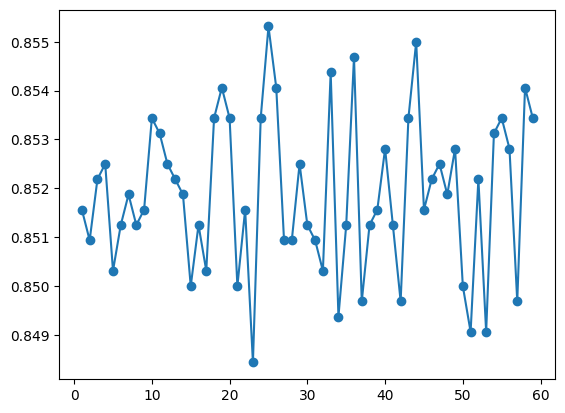

In [17]:
plt.plot(values, test_score, '-o', label='Test')

# Publicando o modelo em producao

In [18]:
model_last = tr.DecisionTreeClassifier( max_depth=34)
model_last.fit(np.concatenate( (X_train, X_test) ),
               np.concatenate( (y_train, y_test) ) )

# Classificacao sobre os dados de producao
yhat_pred = model_last.predict( X_prod )
acc_prod = mt.accuracy_score( y_prod, yhat_prod )

print('Accuracy Over Preduction: {}'.format( acc_prod ) )




Accuracy Over Preduction: 0.85275


# 2.0 Estrategia de Treino Test e Validacao

Total (100%) -> Treino (80%) e Teste (20%)

Treino (80%) -> Treino (60%) e Validacao (20%)

Treino (60%), Validacao (20%), Teste (20%)

~ Modelo -> Treino
-  > Treinar o algoritmo
-  > Validacao -> Encontrar o melhor parametro

Treino (60%) + Validacao (20%) -> Treino (80)

Modelo + Melhor Parametro + Treino (80%) -> Treino Last

Modelo Last -> Teste (20%) -> Performance de Generalizacao

Treino (Treino + validacao ) + Teste -> Producao

# O Problema de Overfiting na Classificacao

In [20]:
# 1.0 Treinamento como o Joaquim: O DS Novato
## Dados sintéticos para produção
n_samples = 20000
n_features = 2
n_informative = 2
n_redundant = 0
random_state = 0

# Dados para treinamento
X, y = ds.make_classification( n_samples=n_samples,
                               n_features=n_features,
                               n_informative=n_informative, 
                               n_redundant=n_redundant,
                               random_state=random_state)
                               
X, X_prod, y, y_prod = ms.train_test_split( X, y, test_size=0.2 )

In [21]:
# ## Não há separação dos Dados

# Modelo treinado e validado com o dataset de Treinamento
model = tr.DecisionTreeClassifier( max_depth=38 )
model.fit( X, y )

# Previsão sobre os dados de treinamento
yhat = model.predict( X )
acc = mt.accuracy_score( y, yhat )
print( "Accuracy Over Training: {}".format( acc ) )


Accuracy Over Training: 1.0


In [22]:
# ## Publicação do Modelo em Produção

# Previsão sobre os dados de treinamento
yhat_prod = model.predict( X_prod )
acc_prod = mt.accuracy_score( y_prod, yhat_prod )
print( "Accuracy Over Production: {}".format( acc_prod ) )


Accuracy Over Production: 0.83925


In [24]:
# # 2.0 Estratégia Treino-Validacao-Teste

# Separação entre Treino e Teste
X_train, X_test, y_train, y_test = ms.train_test_split( X, y, test_size=0.2,random_state=random_state ) 
# Separação entre Treino e Validacao
X_train, X_val, y_train, y_val = ms.train_test_split( X_train, y_train, test_size=
0.2,random_state=random_state ) 



In [25]:

# ## Escolha de parâmetros do algoritmo

# Modelo treinado e validado com o dataset de Treinamento
values = [i for i in range( 1, 60 )]
train_scores, val_scores = list(), list()
for i in values:
    model = tr.DecisionTreeClassifier( max_depth=i )
    model.fit( X_train, y_train )
    # Previsão sobre os dados de treinamento
    yhat_train = model.predict( X_train )
    acc_train = mt.accuracy_score( y_train, yhat_train )
    
    train_scores.append( acc_train )
    # Previsão sobre os dados de test
    yhat_val = model.predict( X_val )
    acc_val = mt.accuracy_score( y_val, yhat_val )
    val_scores.append( acc_val )


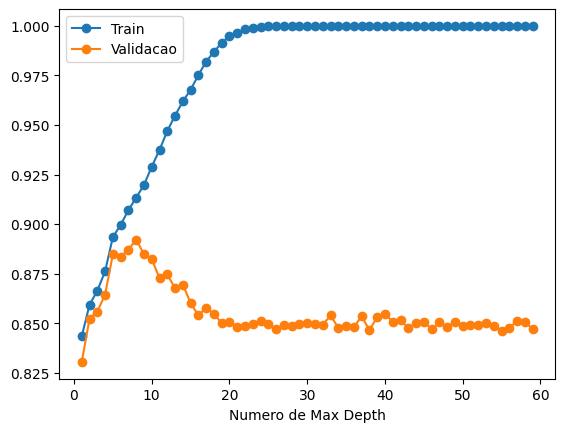

In [27]:
# plot of train and test scores vs tree depth
plt.plot( values, train_scores, '-o', label='Train' )
plt.plot( values, val_scores,  '-o', label='Validacao' )
plt.xlabel('Numero de Max Depth')
plt.legend()
plt.show()


- Azul treino 
- Laran teste

- Toda vez que inter no lup a acuracia sobre o treino era parecida  quando o n era pegueno era parecida quand chegano 9 a alg test era proximo do treino qnd chega no 9 ele overfita ele decora e so da 100 %

In [28]:
# Roda sobre o treino

# Modelo treinado e validado com o dataset de Treinamento
model_last = tr.DecisionTreeClassifier( max_depth=4 )
model_last.fit( X_train , y_train )

# Previsao em cima do ttreino

# Previsão sobre os dados de treinamento
yhat_train = model_last.predict( X_train )
acc_train = mt.accuracy_score( y_train, yhat_train )
print( "Accuracy Over Training: {}".format( acc_train ) )

# O msm algoritimo uma acuracia sobre a validacao

# Previsão sobre os dados de validacao
yhat_val = model_last.predict( X_val )
acc_val = mt.accuracy_score( y_val, yhat_val )
print( "Accuracy Over Validacao: {}".format( acc_val ) )

#Previsao em cima do teste sobre dados que ele nunca viu 

# Previsão sobre os dados de test
yhat_test = model_last.predict( X_test )
acc_test = mt.accuracy_score( y_test, yhat_test )
print( "Accuracy Over Testing: {}".format( acc_test ) )

# meu Dado de Prod que simula minha producao

# Previsão sobre os dados de treinamento
yhat_prod = model_last.predict( X_prod )
acc_prod = mt.accuracy_score( y_prod, yhat_prod )
print( "Accuracy Over Producao: {}".format( acc_prod ) )


# Noa foi juntado terino e validacao para junta a alg final para ver como fica a acuaracia em cima do validadcao

1
# - Quando calcula a metrica do algoritimo em cima do treino ela sempre vai maior de todas pq mais uma vez o alg ja sabe o dado de treinammete porq ele foi usado para treinar o modelo e sempre vai ser o maior ele vai dar per to de 087
# nesse caso se olhar na curva  o parametro aqui e 4 e la o param 4 
# depois quando e treinado 

2
# depois qud treina sobre o daso de val essa perf vai ser uma pouc menor ppq ele nunvca nviu mais dp qie junta para treima ele ate o fial junta trei com vl para treina ele ate o final ai  ele ja bai ter usado o dado de val pata encontta o melhor param ai a gete ja vai ter vazado ele os dados para ele que ele vau fz a prev so qie o dad de tes q foi preparad la no comeco do proble e dado que garabte q eke le nunk viu entao quando fixser o a prev sobr eo dd de tet tem que ser um pouc menor q o dd de trein  ou de vailidadcao um pouco so menor que o dad de treim ou de val  puca coisa 

# generalizando e acertand mai ou meno o que ja fazuia em test

# olha o tets treinamento e prod v se estao proximo o tet tem q repre o dados de produc 



Accuracy Over Training: 0.876171875
Accuracy Over Validacao: 0.864453125
Accuracy Over Testing: 0.86125
Accuracy Over Producao: 0.85875


# O Problema do Overfiting na Regressao

In [30]:
import math
import numpy as np

#